In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# библиотеки для игнорирования предупрждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузим датафрейм в ноутбук

df = pd.read_csv('https://www.dropbox.com/s/hpejw8ddevj5brk/forFBpost.csv?dl=1', sep = ';')
df.head(3)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0


In [3]:
# Переименум столбцы для удобства 

df = df.rename(columns = {'Город': 'city', 'Модель': 'model', 'Нижняя граница': 'floor', 'Верхняя граница': 'ceiling'})
df.head(3)

,city,year,fact,model,floor,ceiling
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0


In [4]:
# Проверим датафрейм на наличие городов с дублирующимися именами
# Создадим столбец 'dup' для идентификации дублей

df['dup'] = df[['city', 'year']].duplicated()
df.query('dup == True').city.value_counts()

# Обнаружены города с идентичными именами

Кировск           121
Краснослободск    121
Name: city, dtype: int64

In [5]:
# Прибавим ко второму городу с тем же именем по списку "1" к имени для их раздельного идентифицирования

df.loc[(df.dup == True), 'city'] = df.city + "1"

In [6]:
df.query('dup == True').head(3)

,city,year,fact,model,floor,ceiling,dup
16940,Кировск1,2000,NaN,33600.0,33300.0,33800.0,True
16941,Кировск1,2001,NaN,33400.0,33200.0,33700.0,True
16942,Кировск1,2002,NaN,33200.0,32900.0,33400.0,True


In [7]:
# Дубликаты устранены, можно удалить столбец dup

df[['city', 'year']].duplicated().sum()

0

In [8]:
df = df.drop(['dup'], axis=1)

In [9]:
df.head(3)

,city,year,fact,model,floor,ceiling
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0


In [10]:
df.shape

(30250, 6)

In [11]:
# Для проведения социально-экономических выводов и гипотез необходимо добавить дополнительные данные
# Проведём классификацию городов по населению
# Напишем функции, определяющие классы городов в зависимости от фактической и прогнозной
# численностей населения https://города-россия.рф

def type_func(quantity):
    if 0 < quantity <= 50000:
        return '1_small'
    elif 50000 < quantity <= 100000:
        return '2_medium'
    elif 100000 < quantity <= 250000:
        return '3_big'
    elif 250000 < quantity <= 500000:
        return '4_large'
    elif 500000 < quantity <= 1000000:
        return '5_largest'
    elif quantity > 1000000:
        return '6_million_plus'
    else:
        return 'no data'

In [12]:
# Применим функции к датафрейму

df['type_f'] = df.fact.apply(type_func)
df['type_m'] = df.model.apply(type_func)
df.head(3)

,city,year,fact,model,floor,ceiling,type_f,type_m
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0,no data,1_small
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0,no data,1_small
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0,no data,1_small


In [13]:
# Отберём города с фактической информацией по численности населению

city_fact = df.query('type_f != "no data"')
city_fact.head(3)

,city,year,fact,model,floor,ceiling,type_f,type_m
8,Белокуриха,2008,14781.0,14900.0,14600.0,15200.0,1_small,1_small
9,Белокуриха,2009,14781.0,14800.0,14500.0,15100.0,1_small,1_small
10,Белокуриха,2010,14701.0,14700.0,14400.0,15100.0,1_small,1_small


In [14]:
# Можем проанализировать отличия прогнозной численности населения от фактической по годам для каждого города

city_fact['f_m_diff_perc'] = round((city_fact.model-city_fact.fact)/city_fact.fact*100, 3)
city_fact.head(3)

,city,year,fact,model,floor,ceiling,type_f,type_m,f_m_diff_perc
8,Белокуриха,2008,14781.0,14900.0,14600.0,15200.0,1_small,1_small,0.805
9,Белокуриха,2009,14781.0,14800.0,14500.0,15100.0,1_small,1_small,0.129
10,Белокуриха,2010,14701.0,14700.0,14400.0,15100.0,1_small,1_small,-0.007


In [15]:
# Наблюдаются значительные отличия прогнозной численности от фактической

city_fact.f_m_diff_perc.describe()

count    3250.000000
mean        0.214530
std         2.735108
min       -41.792000
25%        -0.391500
50%         0.149500
75%         0.806000
max        48.969000
Name: f_m_diff_perc, dtype: float64

In [16]:
# Проанализируем скачок

city_fact.query('f_m_diff_perc == f_m_diff_perc.max()').city

29416    Гудермес
Name: city, dtype: object

In [17]:
city_fact.query('f_m_diff_perc == f_m_diff_perc.min()').city

29423    Гудермес
Name: city, dtype: object

In [18]:
most_volat_city = city_fact.query('f_m_diff_perc == f_m_diff_perc.min()').iloc[0]['city']
most_volat_city

'Гудермес'

In [19]:
# Данные по городу Гудермес

city_fact[city_fact['city'] == most_volat_city]

,city,year,fact,model,floor,ceiling,type_f,type_m,f_m_diff_perc
29411,Гудермес,2008,48360.0,37700.0,17600.0,80700.0,1_small,1_small,-22.043
29412,Гудермес,2009,48360.0,46300.0,24000.0,89300.0,1_small,1_small,-4.260
29413,Гудермес,2010,48360.0,56000.0,31700.0,98900.0,1_small,2_medium,15.798
29414,Гудермес,2011,48360.0,64600.0,38800.0,107500.0,1_small,2_medium,33.581
29415,Гудермес,2012,48360.0,70600.0,43900.0,113500.0,1_small,2_medium,45.988
29416,Гудермес,2013,49205.0,73300.0,46300.0,116200.0,1_small,2_medium,48.969
29417,Гудермес,2014,50051.0,72600.0,45700.0,115500.0,2_medium,2_medium,45.052
29418,Гудермес,2015,50896.0,69000.0,42600.0,111800.0,2_medium,2_medium,35.571
29419,Гудермес,2016,51742.0,63000.0,37600.0,105800.0,2_medium,2_medium,21.758
29420,Гудермес,2017,52587.0,55600.0,31400.0,98300.0,2_medium,2_medium,5.730


Text(0, 0.5, 'Население')

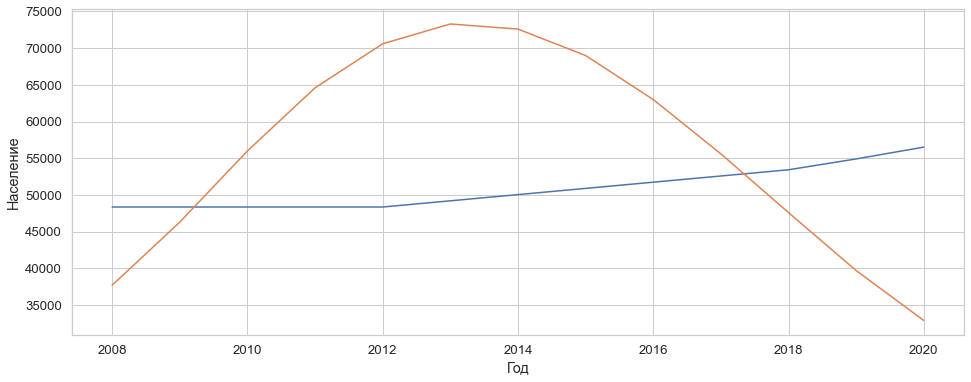

In [20]:
# Построим линейные графики, отражающие изменение фактического и прогнозного населения со временем

plt.figure(figsize=(16,6))
sns.set(font_scale=1.2,style="whitegrid")
sns.lineplot(x="year", y="fact",
             data=city_fact[city_fact['city'] == most_volat_city]) # синий цвет
sns.lineplot(x="year", y="model",
             data=city_fact[city_fact['city'] == most_volat_city]) # оранжевый цвет

plt.xlabel("Год")
plt.ylabel("Население")

# Для установки причин таких сильно отличающихся прогнозных значений от фактических не хватает данных

In [21]:
# Проанализируем в скольки случаях был неверно спрогнозирован класс города

city_fact.query('type_f != type_m').shape[0]

28

In [22]:
# Присвоим интересующим значениям переменные

f_m_diff_mean       = round(city_fact.f_m_diff_perc.mean(), 3)
f_m_diff_median     = round(city_fact.f_m_diff_perc.median(), 3)
f_m_diff_min        = round(city_fact.f_m_diff_perc.min(), 3)
f_m_diff_max        = round(city_fact.f_m_diff_perc.max(), 3)
never_prog_klass    = city_fact.query('type_f != type_m').shape[0]

In [23]:
print(f'''Итог:\nСреднее отличие прогнозной численности от фактической по годам для каждого города равно {f_m_diff_mean}%, \
\nМедианное отличие прогнозной численности от фактической по годам для каждого города равно {f_m_diff_median}%, \
\nНаибольшие различия прогнозной численности от фактической по годам, равные {f_m_diff_max}% и {f_m_diff_min}% \
зафиксированы в городе {most_volat_city}, \
\nВ {never_prog_klass} случаях из годовых прогнозов неверно был определен класс города.''')

Итог:
Среднее отличие прогнозной численности от фактической по годам для каждого города равно 0.215%, 
Медианное отличие прогнозной численности от фактической по годам для каждого города равно 0.149%, 
Наибольшие различия прогнозной численности от фактической по годам, равные 48.969% и -41.792% зафиксированы в городе Гудермес, 
В 28 случаях из годовых прогнозов неверно был определен класс города.


In [24]:
all_years = city_fact.pivot_table(aggfunc = 'count', index = 'type_f', columns = 'year', values = 'fact').reset_index() \
                           .sort_values('type_f', ascending = False)
all_years

year,type_f,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5,6_million_plus,2,2,2,2,2,2,2,2,2,2,2,3,3
4,5_largest,8,8,8,8,8,8,8,8,8,9,9,8,8
3,4_large,8,8,8,8,7,7,7,7,7,6,6,6,6
2,3_big,33,33,33,33,35,35,33,33,33,34,34,35,35
1,2_medium,36,36,37,37,36,36,39,39,39,38,38,37,37
0,1_small,163,163,162,162,162,162,161,161,161,161,161,161,161


In [25]:
# Сравним количество городов по классам 2008 и 2020 года

all_years['type_diff'] = all_years[city_fact.year.max()] - all_years[city_fact.year.min()] 
all_years

year,type_f,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,type_diff
5,6_million_plus,2,2,2,2,2,2,2,2,2,2,2,3,3,1
4,5_largest,8,8,8,8,8,8,8,8,8,9,9,8,8,0
3,4_large,8,8,8,8,7,7,7,7,7,6,6,6,6,-2
2,3_big,33,33,33,33,35,35,33,33,33,34,34,35,35,2
1,2_medium,36,36,37,37,36,36,39,39,39,38,38,37,37,1
0,1_small,163,163,162,162,162,162,161,161,161,161,161,161,161,-2


In [26]:
print(f'''Итог:\nКоличество городов-миллионников (более 1000000 жителей) изменилось на {all_years.type_diff[5]}, \
\nКоличество крупнейших городов (от 500 тысяч до 1 миллиона жителей) изменилось на {all_years.type_diff[4]}, \
\nКоличество крупных городов (более 250 тысяч жителей) изменилось на {all_years.type_diff[3]}, \
\nКоличество больших городов (более 100 тысяч жителей) изменилось на {all_years.type_diff[2]}, \
\nКоличество средних городов (до 100 тысяч жителей) изменилось на {all_years.type_diff[1]}, \
\nКоличество малых городов (до 50 тысяч жителей) изменилось на {all_years.type_diff[0]}.''')

Итог:
Количество городов-миллионников (более 1000000 жителей) изменилось на 1, 
Количество крупнейших городов (от 500 тысяч до 1 миллиона жителей) изменилось на 0, 
Количество крупных городов (более 250 тысяч жителей) изменилось на -2, 
Количество больших городов (более 100 тысяч жителей) изменилось на 2, 
Количество средних городов (до 100 тысяч жителей) изменилось на 1, 
Количество малых городов (до 50 тысяч жителей) изменилось на -2.


In [27]:
# Распределение населения по типу городов на все года

all_pop_by_type = city_fact.pivot_table(aggfunc = 'sum', index = 'type_f', columns = 'year', values = 'fact').reset_index() \
                           .sort_values('type_f', ascending = False)
all_pop_by_type

year,type_f,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5,6_million_plus,12221908.0,12316688.0,12453429.0,12855073.0,12940998.0,13076432.0,13219517.0,13316254.0,13453889.0,13509427.0,13639923.0,14768152.0,14831961.0
4,5_largest,4844020.0,4844885.0,4927406.0,4947886.0,4989169.0,5029727.0,5072541.0,5110883.0,5146947.0,5677998.0,5699836.0,4703581.0,4694489.0
3,4_large,2740356.0,2743541.0,2756769.0,2765648.0,2531213.0,2546181.0,2561402.0,2576784.0,2593204.0,2104635.0,2108670.0,2116455.0,2122276.0
2,3_big,4533454.0,4533112.0,4553317.0,4563309.0,4923163.0,4936375.0,4749703.0,4766960.0,4785072.0,4898100.0,4931835.0,5079911.0,5077005.0
1,2_medium,2537564.0,2535735.0,2590357.0,2581445.0,2480814.0,2503374.0,2751356.0,2750158.0,2747315.0,2642226.0,2630672.0,2527318.0,2522802.0
0,1_small,3747108.0,3738270.0,3658852.0,3640079.0,3622043.0,3605967.0,3542733.0,3531587.0,3519217.0,3502797.0,3479318.0,3460734.0,3457742.0


In [28]:
# Добавим колонку с информацией о разнице населения в каждом типе городов  2008 и 2020 года

all_pop_by_type['differ_2008_2020'] = all_pop_by_type[2020]-all_pop_by_type[2008]
all_pop_by_type

year,type_f,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,differ_2008_2020
5,6_million_plus,12221908.0,12316688.0,12453429.0,12855073.0,12940998.0,13076432.0,13219517.0,13316254.0,13453889.0,13509427.0,13639923.0,14768152.0,14831961.0,2610053.0
4,5_largest,4844020.0,4844885.0,4927406.0,4947886.0,4989169.0,5029727.0,5072541.0,5110883.0,5146947.0,5677998.0,5699836.0,4703581.0,4694489.0,-149531.0
3,4_large,2740356.0,2743541.0,2756769.0,2765648.0,2531213.0,2546181.0,2561402.0,2576784.0,2593204.0,2104635.0,2108670.0,2116455.0,2122276.0,-618080.0
2,3_big,4533454.0,4533112.0,4553317.0,4563309.0,4923163.0,4936375.0,4749703.0,4766960.0,4785072.0,4898100.0,4931835.0,5079911.0,5077005.0,543551.0
1,2_medium,2537564.0,2535735.0,2590357.0,2581445.0,2480814.0,2503374.0,2751356.0,2750158.0,2747315.0,2642226.0,2630672.0,2527318.0,2522802.0,-14762.0
0,1_small,3747108.0,3738270.0,3658852.0,3640079.0,3622043.0,3605967.0,3542733.0,3531587.0,3519217.0,3502797.0,3479318.0,3460734.0,3457742.0,-289366.0


In [29]:
print(f'''Итог:\nКоличество жителей городов-миллионников (более 1000000 жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[5]/1000, 3)} тыс.чел., \
\nКоличество жителей крупнейших городов (от 500 тысяч до 1 миллиона жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[4]/1000, 3)} тыс.чел., \
\nКоличество жителей крупных городов (более 250 тысяч жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[3]/1000, 3)} тыс.чел., \
\nКоличество жителей больших городов (более 100 тысяч жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[2]/1000, 3)} тыс.чел., \
\nКоличество жителей средних городов (до 100 тысяч жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[1]/1000, 3)} тыс.чел., \
\nКоличество жителей малых городов (до 50 тысяч жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[0]/1000, 3)} тыс.чел..''')

Итог:
Количество жителей городов-миллионников (более 1000000 жителей) изменилось на 2610.053 тыс.чел., 
Количество жителей крупнейших городов (от 500 тысяч до 1 миллиона жителей) изменилось на -149.531 тыс.чел., 
Количество жителей крупных городов (более 250 тысяч жителей) изменилось на -618.08 тыс.чел., 
Количество жителей больших городов (более 100 тысяч жителей) изменилось на 543.551 тыс.чел., 
Количество жителей средних городов (до 100 тысяч жителей) изменилось на -14.762 тыс.чел., 
Количество жителей малых городов (до 50 тысяч жителей) изменилось на -289.366 тыс.чел..


In [30]:
# Динамика изменений количества населения для каждого города с 2008 по 2020 год

population = city_fact.pivot(index = 'city', columns = 'year', values = 'fact')
population = population.reset_index()
population.head(3)

year,city,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Буй,25601.0,25403.0,25810.0,25425.0,24988.0,24663.0,24423.0,24206.0,24054.0,23910.0,23693.0,23406.0,23406.0
1,Оха,30125.0,29653.0,25963.0,25362.0,24678.0,24108.0,23664.0,23313.0,23041.0,22762.0,22417.0,22024.0,22024.0
2,Реж,49076.0,49076.0,48693.0,48310.0,48086.0,47972.0,47997.0,47909.0,47773.0,47616.0,47311.0,47116.0,46898.0


In [31]:
# Сравним показатели населения 2008 и 2020 года для каждого города

population['differ_2008_2020'] = population[city_fact.year.max()]  - population[city_fact.year.min()]
population.head(3)

year,city,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,differ_2008_2020
0,Буй,25601.0,25403.0,25810.0,25425.0,24988.0,24663.0,24423.0,24206.0,24054.0,23910.0,23693.0,23406.0,23406.0,-2195.0
1,Оха,30125.0,29653.0,25963.0,25362.0,24678.0,24108.0,23664.0,23313.0,23041.0,22762.0,22417.0,22024.0,22024.0,-8101.0
2,Реж,49076.0,49076.0,48693.0,48310.0,48086.0,47972.0,47997.0,47909.0,47773.0,47616.0,47311.0,47116.0,46898.0,-2178.0


In [32]:
# Напишем функцию, идентифицирующую прирост/убыль населения

def grow_func(x):
    if x < 0:
        return 'declining'
    if x > 0:
        return 'growing'
    else:
        return 'stagnating'

In [33]:
# Добавим столбец, отвечающий за прирост/убыль населения для каждого города

population['status'] = population.differ_2008_2020.apply(grow_func)
population.head(3)

year,city,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,differ_2008_2020,status
0,Буй,25601.0,25403.0,25810.0,25425.0,24988.0,24663.0,24423.0,24206.0,24054.0,23910.0,23693.0,23406.0,23406.0,-2195.0,declining
1,Оха,30125.0,29653.0,25963.0,25362.0,24678.0,24108.0,23664.0,23313.0,23041.0,22762.0,22417.0,22024.0,22024.0,-8101.0,declining
2,Реж,49076.0,49076.0,48693.0,48310.0,48086.0,47972.0,47997.0,47909.0,47773.0,47616.0,47311.0,47116.0,46898.0,-2178.0,declining


In [34]:
# Обозначим классы городов для 2008 и 2020 года

population['type_2008'] = population[2008].apply(type_func)
population['type_2020'] = population[2020].apply(type_func)
population.head(3)

year,city,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,differ_2008_2020,status,type_2008,type_2020
0,Буй,25601.0,25403.0,25810.0,25425.0,24988.0,24663.0,24423.0,24206.0,24054.0,23910.0,23693.0,23406.0,23406.0,-2195.0,declining,1_small,1_small
1,Оха,30125.0,29653.0,25963.0,25362.0,24678.0,24108.0,23664.0,23313.0,23041.0,22762.0,22417.0,22024.0,22024.0,-8101.0,declining,1_small,1_small
2,Реж,49076.0,49076.0,48693.0,48310.0,48086.0,47972.0,47997.0,47909.0,47773.0,47616.0,47311.0,47116.0,46898.0,-2178.0,declining,1_small,1_small


In [35]:
# Население городов на 2008 год

round(population[city_fact.year.min()].sum())

30624410

In [36]:
# Население городов на 2020 год

round(population[city_fact.year.max()].sum())

32706275

In [37]:
# Общий прирост численности населения

round(population.differ_2008_2020.sum())

2081865

In [38]:
# Общий прирост населения в процентах от численности на 2008 год

round(population.differ_2008_2020.sum() / population[city_fact.year.min()].sum() * 100, 2)

6.8

In [39]:
# Средний рост численности городов составил

population.differ_2008_2020.mean()

8327.46

In [40]:
# При этом медианный рост численности городов составил

population.differ_2008_2020.median()

-774.5

In [41]:
# Численность городов с падающим населением

population.query('status == "declining"').shape[0]

158

In [42]:
# Численность городов с растущим населением

population.query('status == "growing"').shape[0]

92

In [43]:
# Присвоим интересующим значениям переменные

population_2008 = round(population[city_fact.year.min()].sum())
population_2020 = round(population[city_fact.year.max()].sum())
pop_growth      = round(population.differ_2008_2020.sum())
perc_pop_growth = round(population.differ_2008_2020.sum() / population_2008 * 100, 2)
mean_diff       = population.differ_2008_2020.mean()
median_diff     = population.differ_2008_2020.median()
decl_cities     = population.query('status == "declining"').shape[0]
grow_cities     = population.query('status == "growing"').shape[0]

In [44]:
print(f'''Итог:\nКоличество населения в городах на 2008 год составляло {round(population_2008/1000000, 3)} млн. чел., \
\nКоличество населения в городах на 2020 год составляло {round(population_2020/1000000, 3)} млн. чел., \
\nРост городского начеления составил с 2008 по 2020 год {round(pop_growth/1000000, 3)} млн. чел., \
\nРост городского населения в процентах с 2008 по 2020 год составил {perc_pop_growth}%,, \
\nСреднегодовой рост в процентах составил {round(perc_pop_growth/(city_fact.year.max() - city_fact.year.min()), 2)}%, \
\nСредний рост населения с 2008 по 2020 год в городах составил {mean_diff} чел., \
\nМедианный рост населения с 2008 по 2020 год в городах составил {median_diff} чел., \
\nКоличество городов, население которых с 2008 по 2020 уменьшилось составило {decl_cities}, \
\nКоличество городов, население которых с 2008 по 2020 увеличилось составило {grow_cities}.''')

Итог:
Количество населения в городах на 2008 год составляло 30.624 млн. чел., 
Количество населения в городах на 2020 год составляло 32.706 млн. чел., 
Рост городского начеления составил с 2008 по 2020 год 2.082 млн. чел., 
Рост городского населения в процентах с 2008 по 2020 год составил 6.8%,, 
Среднегодовой рост в процентах составил 0.57%, 
Средний рост населения с 2008 по 2020 год в городах составил 8327.46 чел., 
Медианный рост населения с 2008 по 2020 год в городах составил -774.5 чел., 
Количество городов, население которых с 2008 по 2020 уменьшилось составило 158, 
Количество городов, население которых с 2008 по 2020 увеличилось составило 92.


In [45]:
# Рассмотрим растущие и уменьшающиеся города по отдельности
# Для удобства разделим данные на два датафрейма, содержащие информацию по растущим и уменьшающимся городам

declining_cities = population.query('status == "declining"')
growing_cities = population.query('status == "growing"')

In [46]:
# Города, в которых с 2008 по 2020 год изменился класс города по населению в убывающую сторону

spis_gor_pad_nas = list(declining_cities.query('type_2008 != type_2020').city)
neg = declining_cities['city'].isin(spis_gor_pad_nas) 
declining_cities[neg]

year,city,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,differ_2008_2020,status,type_2008,type_2020
42,Воркута,111983.0,111983.0,96852.0,93293.0,89713.0,86367.0,83830.0,82197.0,80752.0,78687.0,76035.0,73940.0,72773.0,-39210.0,declining,3_big,2_medium
59,Дзержинск,253570.0,253570.0,251773.0,250091.0,248649.0,247067.0,245376.0,244028.0,242736.0,241376.0,240069.0,239130.0,239130.0,-14440.0,declining,4_large,3_big
124,Ленинск-Кузнецкий,106990.0,106990.0,104074.0,103224.0,102285.0,101676.0,101145.0,100305.0,99415.0,98645.0,97827.0,96958.0,96958.0,-10032.0,declining,3_big,2_medium
160,Новотроицк,109405.0,108797.0,105367.0,104476.0,103059.0,101549.0,99757.0,97845.0,96037.0,94199.0,92394.0,90870.0,89570.0,-19835.0,declining,3_big,2_medium
212,Таганрог,258326.0,258326.0,258326.0,256888.0,255674.0,254185.0,253314.0,252045.0,250668.0,250068.0,249256.0,248654.0,248456.0,-9870.0,declining,4_large,3_big


In [47]:
# Города, в которых с 2008 по 2020 год изменился класс города по населению в растущую сторону

spis_gor_ras_nas = list(growing_cities.query('type_2008 != type_2020').city)
pos = growing_cities['city'].isin(spis_gor_ras_nas) 
growing_cities[pos]

year,city,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,differ_2008_2020,status,type_2008,type_2020
54,Гудермес,48360.0,48360.0,48360.0,48360.0,48360.0,49205.0,50051.0,50896.0,51742.0,52587.0,53433.0,54910.0,56521.0,8161.0,growing,1_small,2_medium
67,Ессентуки,97949.0,97949.0,99949.0,101288.0,101855.0,102681.0,103690.0,105084.0,106643.0,108042.0,109579.0,111768.0,111768.0,13819.0,growing,2_medium,3_big
69,Железногорск,97752.0,98331.0,94841.0,95479.0,96195.0,97082.0,98179.0,99220.0,100177.0,100705.0,100620.0,100472.0,100472.0,2720.0,growing,2_medium,3_big
111,Краснодар,782547.0,782547.0,830536.0,842610.0,861181.0,882271.0,905601.0,930841.0,958390.0,981578.0,999084.0,1014996.0,1014996.0,232449.0,growing,5_largest,6_million_plus
186,Реутов,83137.0,83137.0,86928.0,88387.0,90139.0,91277.0,92854.0,95404.0,98308.0,101884.0,104696.0,107508.0,107508.0,24371.0,growing,2_medium,3_big
191,Саяногорск,48561.0,48561.0,63380.0,62835.0,62370.0,62139.0,61989.0,61690.0,61208.0,60665.0,59979.0,59205.0,58460.0,9899.0,growing,1_small,2_medium
202,Соликамск,96746.0,95703.0,97661.0,96983.0,96532.0,96067.0,95671.0,95353.0,94910.0,94248.0,93493.0,108825.0,108128.0,11382.0,growing,2_medium,3_big
230,Химки,187403.0,187403.0,206341.0,212173.0,218273.0,223381.0,228872.0,236017.0,242318.0,247678.0,252413.0,257149.0,257149.0,69746.0,growing,3_big,4_large
232,Чебоксары,454615.0,457800.0,462510.0,468327.0,473189.0,477374.0,481867.0,487888.0,495679.0,501467.0,504341.0,506928.0,507121.0,52506.0,growing,4_large,5_largest


In [48]:
# топ-10 городов по падению в абсолютном отношении фактического населения с 2008 по 2020 год

declining_cities.sort_values('differ_2008_2020', ascending = True).head(10)

year,city,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,differ_2008_2020,status,type_2008,type_2020
42,Воркута,111983.0,111983.0,96852.0,93293.0,89713.0,86367.0,83830.0,82197.0,80752.0,78687.0,76035.0,73940.0,72773.0,-39210.0,declining,3_big,2_medium
215,Тольятти,721049.0,721049.0,719514.0,719599.0,719372.0,718638.0,718886.0,716132.0,711593.0,708988.0,705119.0,701130.0,701130.0,-19919.0,declining,5_largest,5_largest
160,Новотроицк,109405.0,108797.0,105367.0,104476.0,103059.0,101549.0,99757.0,97845.0,96037.0,94199.0,92394.0,90870.0,89570.0,-19835.0,declining,3_big,2_medium
226,Усть-Илимск,96699.0,96699.0,86754.0,85766.0,84721.0,83975.0,83329.0,82922.0,82637.0,82215.0,81528.0,80750.0,80750.0,-15949.0,declining,2_medium,2_medium
59,Дзержинск,253570.0,253570.0,251773.0,250091.0,248649.0,247067.0,245376.0,244028.0,242736.0,241376.0,240069.0,239130.0,239130.0,-14440.0,declining,4_large,3_big
75,Инта,39088.0,37289.0,35544.0,34221.0,32940.0,31842.0,30928.0,30122.0,29354.0,28562.0,27858.0,27174.0,26559.0,-12529.0,declining,1_small,1_small
210,Сызрань,179538.0,179538.0,179730.0,179091.0,178205.0,177276.0,176429.0,175665.0,174675.0,173046.0,170757.0,168651.0,168651.0,-10887.0,declining,3_big,3_big
124,Ленинск-Кузнецкий,106990.0,106990.0,104074.0,103224.0,102285.0,101676.0,101145.0,100305.0,99415.0,98645.0,97827.0,96958.0,96958.0,-10032.0,declining,3_big,2_medium
212,Таганрог,258326.0,258326.0,258326.0,256888.0,255674.0,254185.0,253314.0,252045.0,250668.0,250068.0,249256.0,248654.0,248456.0,-9870.0,declining,4_large,3_big
159,Новокуйбышевск,112524.0,112524.0,110964.0,110229.0,109521.0,108732.0,107782.0,106714.0,105658.0,104720.0,103692.0,102845.0,102845.0,-9679.0,declining,3_big,3_big


In [49]:
# Найдём топ-10 городов по падению населения в процентом соотношении

perc_decl = declining_cities[['city', 2008, 2020, 'differ_2008_2020']]
perc_decl['perc_growth'] = (declining_cities[2020]-declining_cities[2008])/declining_cities[2008]*100
perc_decl.sort_values('perc_growth', ascending = True).head(10)

year,city,2008,2020,differ_2008_2020,perc_growth
42,Воркута,111983.0,72773.0,-39210.0,-35.014243
75,Инта,39088.0,26559.0,-12529.0,-32.053316
8,Александровск-Сахалинский,15041.0,10768.0,-4273.0,-28.409015
153,Николаевск-на-Амуре,25201.0,18049.0,-7152.0,-28.379826
1,Оха,30125.0,22024.0,-8101.0,-26.891286
6,Агидель,19183.0,14077.0,-5106.0,-26.617317
183,Пучеж,8637.0,6366.0,-2271.0,-26.293852
25,Бодайбо,15388.0,11962.0,-3426.0,-22.264102
7,Алатырь,41975.0,33394.0,-8581.0,-20.443121
231,Холмск,45083.0,36246.0,-8837.0,-19.601624


In [50]:
# Город с самым убывающим населением в процентном соотношении

most_decl_perc = list(perc_decl.sort_values('perc_growth', ascending = True).head(10).city)
most_decl_perc

['Воркута',
 'Инта',
 'Александровск-Сахалинский',
 'Николаевск-на-Амуре',
 ' Оха',
 'Агидель',
 'Пучеж',
 'Бодайбо',
 'Алатырь',
 'Холмск']

In [51]:
top_10_gor_pad = list(declining_cities.sort_values('differ_2008_2020', ascending = True).head(10).city)
top_10_gor_pad

['Воркута',
 'Тольятти',
 'Новотроицк',
 'Усть-Илимск',
 'Дзержинск',
 'Инта',
 'Сызрань',
 'Ленинск-Кузнецкий',
 'Таганрог',
 'Новокуйбышевск']

In [52]:
# топ-10 городов по приросту фактического населения в абсолютном отношении с 2008 по 2020 год

growing_cities.sort_values('differ_2008_2020', ascending = False).head(10)

year,city,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,differ_2008_2020,status,type_2008,type_2020
141,Москва,11186851.0,11281631.0,11382161.0,11776764.0,11856578.0,11979529.0,12108257.0,12197596.0,12330126.0,12380664.0,12506468.0,12615279.0,12678079.0,1491228.0,growing,6_million_plus,6_million_plus
111,Краснодар,782547.0,782547.0,830536.0,842610.0,861181.0,882271.0,905601.0,930841.0,958390.0,981578.0,999084.0,1014996.0,1014996.0,232449.0,growing,5_largest,6_million_plus
3,Уфа,1035057.0,1035057.0,1071268.0,1078309.0,1084420.0,1096903.0,1111260.0,1118658.0,1123763.0,1128763.0,1133455.0,1137877.0,1138886.0,103829.0,growing,6_million_plus,6_million_plus
230,Химки,187403.0,187403.0,206341.0,212173.0,218273.0,223381.0,228872.0,236017.0,242318.0,247678.0,252413.0,257149.0,257149.0,69746.0,growing,3_big,4_large
245,Якутск,276821.0,276821.0,285106.0,290911.0,298926.0,306899.0,313370.0,318273.0,322623.0,326571.0,332009.0,337594.0,343423.0,66602.0,growing,4_large,4_large
13,Анапа,141105.0,141105.0,146475.0,150843.0,156927.0,163488.0,171153.0,178704.0,184162.0,186007.0,190054.0,199851.0,199851.0,58746.0,growing,3_big,3_big
232,Чебоксары,454615.0,457800.0,462510.0,468327.0,473189.0,477374.0,481867.0,487888.0,495679.0,501467.0,504341.0,506928.0,507121.0,52506.0,growing,4_large,5_largest
168,Оренбург,540230.0,539769.0,563876.0,567321.0,571041.0,573670.0,576197.0,577411.0,578845.0,579759.0,580051.0,583624.0,587197.0,46967.0,growing,5_largest,5_largest
216,Томск,554010.0,554010.0,554010.0,554010.0,565000.0,574029.0,582473.0,588520.0,592372.0,594627.0,595824.0,597133.0,593760.0,39750.0,growing,5_largest,5_largest
105,Коломна,148428.0,148428.0,144415.0,144848.0,144835.0,144512.0,144285.0,143916.0,143852.0,143408.0,163694.0,183980.0,183980.0,35552.0,growing,3_big,3_big


In [53]:
# Найдём топ-10 городов по приросту населения в процентом соотношении

perc_grow = growing_cities[['city', 2008, 2020, 'differ_2008_2020']]
perc_grow['perc_growth'] = (growing_cities[2020]-growing_cities[2008])/growing_cities[2008]*100
perc_grow.sort_values('perc_growth', ascending = False).head(10)

year,city,2008,2020,differ_2008_2020,perc_growth
130,Магас,4431.0,8295.0,3864.0,87.203791
13,Анапа,141105.0,199851.0,58746.0,41.632827
139,Михайловка,63007.0,86792.0,23785.0,37.749774
87,Карабулак,30566.0,42097.0,11531.0,37.724923
230,Химки,187403.0,257149.0,69746.0,37.217120
111,Краснодар,782547.0,1014996.0,232449.0,29.704158
186,Реутов,83137.0,107508.0,24371.0,29.314264
245,Якутск,276821.0,343423.0,66602.0,24.059591
105,Коломна,148428.0,183980.0,35552.0,23.952354
53,Губкинский,23298.0,28633.0,5335.0,22.898961


In [54]:
# Город с самым нарастающим населением в процентном соотношении

most_grow_perc = list(perc_grow.sort_values('perc_growth', ascending = False).head(10).city)
most_grow_perc

['Магас',
 'Анапа',
 'Михайловка',
 'Карабулак',
 'Химки',
 'Краснодар',
 'Реутов',
 'Якутск',
 'Коломна',
 'Губкинский']

In [55]:
top_10_gor_rost = list(growing_cities.sort_values('differ_2008_2020', ascending = False).head(10).city)
top_10_gor_rost

['Москва',
 'Краснодар',
 ' Уфа',
 'Химки',
 'Якутск',
 'Анапа',
 'Чебоксары',
 'Оренбург',
 'Томск',
 'Коломна']

In [56]:
print(f'''Итог:\nГорода, класс которых уменьшился с 2008 по 2020 год:\n {spis_gor_pad_nas}, \
\nГорода, класс которых увеличился с 2008 по 2020 год:\n {spis_gor_ras_nas}, \
\nТоп-10 городов по падению населения в абсолютном отношении:\n {top_10_gor_pad}, \
\nТоп-10 городов по росту населения в абсолютном отношении:\n {top_10_gor_rost}, \
\nТоп-10 городов по падению населения в процентном отношении:\n {most_decl_perc}, \
\nТоп-10 городов по росту населения в процентном отношении:\n {most_grow_perc}.''')

Итог:
Города, класс которых уменьшился с 2008 по 2020 год:
 ['Воркута', 'Дзержинск', 'Ленинск-Кузнецкий', 'Новотроицк', 'Таганрог'], 
Города, класс которых увеличился с 2008 по 2020 год:
 ['Гудермес', 'Ессентуки', 'Железногорск', 'Краснодар', 'Реутов', 'Саяногорск', 'Соликамск', 'Химки', 'Чебоксары'], 
Топ-10 городов по падению населения в абсолютном отношении:
 ['Воркута', 'Тольятти', 'Новотроицк', 'Усть-Илимск', 'Дзержинск', 'Инта', 'Сызрань', 'Ленинск-Кузнецкий', 'Таганрог', 'Новокуйбышевск'], 
Топ-10 городов по росту населения в абсолютном отношении:
 ['Москва', 'Краснодар', ' Уфа', 'Химки', 'Якутск', 'Анапа', 'Чебоксары', 'Оренбург', 'Томск', 'Коломна'], 
Топ-10 городов по падению населения в процентном отношении:
 ['Воркута', 'Инта', 'Александровск-Сахалинский', 'Николаевск-на-Амуре', ' Оха', 'Агидель', 'Пучеж', 'Бодайбо', 'Алатырь', 'Холмск'], 
Топ-10 городов по росту населения в процентном отношении:
 ['Магас', 'Анапа', 'Михайловка', 'Карабулак', 'Химки', 'Краснодар', 'Реутов',

-

In [57]:
population_fact_model = df.groupby('year', as_index = False).agg({'fact': 'sum', 'model': 'sum'})
population_fact_model.head(3)

,year,fact,model
0,2000,0.0,28553300.0
1,2001,0.0,28711700.0
2,2002,0.0,28942700.0


In [58]:
# Среднегодовой прирост для прогнозного населения на 120 лет 

sred_prir_pop = round(((population_fact_model.model[120] - population_fact_model.model[0]) / population_fact_model.model[0]) / population_fact_model.shape[0] * 100, 2)
sred_prir_pop

0.35

Text(0, 0.5, 'Население')

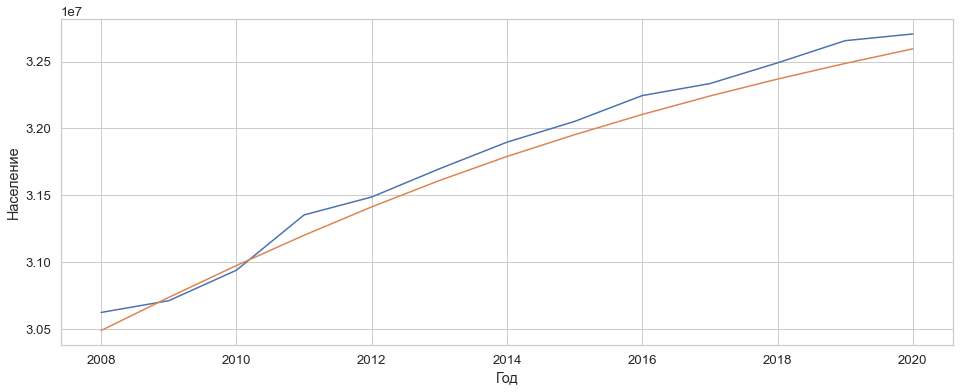

In [59]:
# Построим линейные графики, отражающие изменение фактического и прогнозного населения со временем для всего населения

plt.figure(figsize=(16,6))
sns.set(font_scale=1.2,style="whitegrid")
sns.lineplot(x="year", y="fact",
             data=population_fact_model.query('2008 <= year <= 2020')) # синий цвет
sns.lineplot(x="year", y="model",
             data=population_fact_model.query('2008 <= year <= 2020')) # оранжевый цвет

plt.xlabel("Год")
plt.ylabel("Население")

Text(0, 0.5, 'Население')

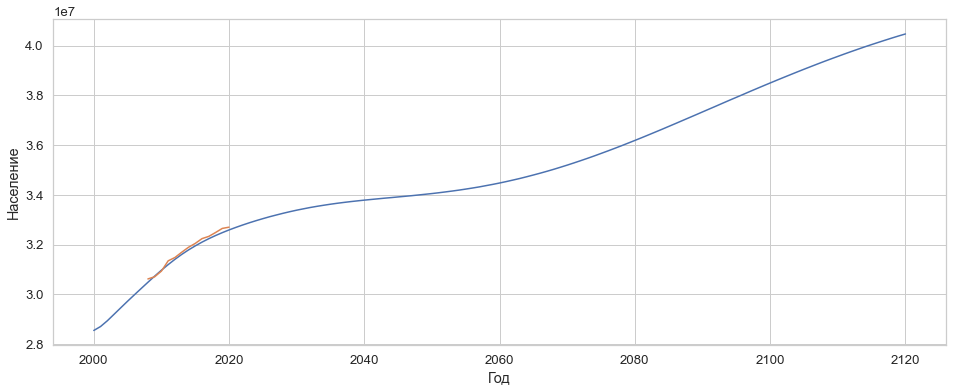

In [60]:
# Построим линейные график, отражающие изменение прогнозного населения со временем для всего населения

plt.figure(figsize=(16,6))
sns.set(font_scale=1.2,style="whitegrid")

sns.lineplot(x="year", y="model",
             data=population_fact_model) 
sns.lineplot(x="year", y="fact",
             data=population_fact_model.query('2008 <= year <= 2020')) # синий цвет

plt.xlabel("Год")
plt.ylabel("Население")

In [66]:
print(f'''Общие итоги:\nСреднее отличие прогнозной численности от фактической по годам для каждого города равно {f_m_diff_mean}%, \
\nМедианное отличие прогнозной численности от фактической по годам для каждого города равно {f_m_diff_median}%, \
\nНаибольшие различия прогнозной численности от фактической по годам, равные {f_m_diff_max}% и {f_m_diff_min}% \
зафиксированы в городе {most_volat_city}, \
\nВ {never_prog_klass} случаях из годовых прогнозов неверно был определен класс города, \
\nКоличество городов-миллионников с 2008 по 2020 (более 1000000 жителей) изменилось на {all_years.type_diff[5]}, \
\nКоличество крупнейших городов с 2008 по 2020 (от 500 тысяч до 1 миллиона жителей) изменилось на {all_years.type_diff[4]}, \
\nКоличество крупных городов с 2008 по 2020 (более 250 тысяч жителей) изменилось на {all_years.type_diff[3]}, \
\nКоличество больших городов с 2008 по 2020 (более 100 тысяч жителей) изменилось на {all_years.type_diff[2]}, \
\nКоличество средних городов с 2008 по 2020 (до 100 тысяч жителей) изменилось на {all_years.type_diff[1]}, \
\nКоличество малых городов с 2008 по 2020 (до 50 тысяч жителей) изменилось на {all_years.type_diff[0]}, \
\nПРИМЕЧАНИЕ НА ИЗМЕНЕНИЕ КОЛИЧЕСТВА ЖИТЕЛЕЙ БОЛЬШОЕ ВЛИЯНИЕ ОКАЗЫВАЛО ИЗМЕНЕНИЕ КЛАССА ГОРОДА, \
\nКоличество жителей городов-миллионников с 2008 по 2020 (более 1000000 жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[5]/1000, 3)} тыс.чел., \
\nКоличество жителей крупнейших городов с 2008 по 2020 (от 500 тысяч до 1 миллиона жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[4]/1000, 3)} тыс.чел., \
\nКоличество жителей крупных городов с 2008 по 2020 (более 250 тысяч жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[3]/1000, 3)} тыс.чел., \
\nКоличество жителей больших городов с 2008 по 2020 (более 100 тысяч жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[2]/1000, 3)} тыс.чел., \
\nКоличество жителей средних городов с 2008 по 2020 (до 100 тысяч жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[1]/1000, 3)} тыс.чел., \
\nКоличество жителей малых городов с 2008 по 2020 (до 50 тысяч жителей) изменилось на {round(all_pop_by_type.differ_2008_2020[0]/1000, 3)} тыс.чел. \
\nКоличество населения в городах на 2008 год составляло {round(population_2008/1000000, 3)} млн. чел., \
\nКоличество населения в городах на 2020 год составляло {round(population_2020/1000000, 3)} млн. чел., \
\nРост городского начеления составил с 2008 по 2020 год {round(pop_growth/1000000, 3)} млн. чел., \
\nРост городского населения в процентах с 2008 по 2020 год составил {perc_pop_growth}%,, \
\nСреднегодовой рост фактического населения в процентах составил {round(perc_pop_growth/(city_fact.year.max() - city_fact.year.min()), 2)}%, \
\nСредний рост населения с 2008 по 2020 год в городах составил {mean_diff} чел., \
\nМедианный рост населения с 2008 по 2020 год в городах составил {median_diff} чел., \
\nКоличество городов, население которых с 2008 по 2020 уменьшилось составило {decl_cities}, \
\nКоличество городов, население которых с 2008 по 2020 увеличилось составило {grow_cities}, \
\nГорода, класс которых уменьшился с 2008 по 2020 год:\n {spis_gor_pad_nas}, \
\nГорода, класс которых увеличился с 2008 по 2020 год:\n {spis_gor_ras_nas}, \
\nТоп-10 городов по падению населения в абсолютном отношении:\n {top_10_gor_pad}, \
\nТоп-10 городов по росту населения в абсолютном отношении:\n {top_10_gor_rost}, \
\nТоп-10 городов по падению населения в процентном отношении:\n {most_decl_perc}, \
\nТоп-10 городов по росту населения в процентном отношении:\n {most_grow_perc},
\nСреднегодовой прогнозный прирост населения с 2000 по 2120 год составил {sred_prir_pop}%''')
    

Общие итоги:
Среднее отличие прогнозной численности от фактической по годам для каждого города равно 0.215%, 
Медианное отличие прогнозной численности от фактической по годам для каждого города равно 0.149%, 
Наибольшие различия прогнозной численности от фактической по годам, равные 48.969% и -41.792% зафиксированы в городе Гудермес, 
В 28 случаях из годовых прогнозов неверно был определен класс города, 
Количество городов-миллионников с 2008 по 2020 (более 1000000 жителей) изменилось на 1, 
Количество крупнейших городов с 2008 по 2020 (от 500 тысяч до 1 миллиона жителей) изменилось на 0, 
Количество крупных городов с 2008 по 2020 (более 250 тысяч жителей) изменилось на -2, 
Количество больших городов с 2008 по 2020 (более 100 тысяч жителей) изменилось на 2, 
Количество средних городов с 2008 по 2020 (до 100 тысяч жителей) изменилось на 1, 
Количество малых городов с 2008 по 2020 (до 50 тысяч жителей) изменилось на -2, 
ПРИМЕЧАНИЕ НА ИЗМЕНЕНИЕ КОЛИЧЕСТВА ЖИТЕЛЕЙ БОЛЬШОЕ ВЛИЯНИЕ ОКАЗЫВА